- Adult Census Data<br>
- Goal : To predict whether the income of person exceeds 50k USD per year or not. <br>
- 15 Columns (9 categorical data) 3488 rows <br>
- majority : miniority class = 7 : 3 <br>
- missing data : about 13% <br>
- Evaluation Metric: ROC - AUC
- Reason for choosing ROC-AUC as evaluation metric : Since the data is census, both the classes( income group above 50k USD and less than 50K USD is important for economy) are important to be evaluated so I chose ROC- AUC as my evaltuation metric

- Best Model : XGBoost Model
- Best Model Parameters : XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
- Best Model mean cross validation score: 0.96
- Best Model Train score: 0.99
- Best Model Test Score : 0.95

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
#This is census data. The task here is to predict whether income of person exceeds 50000$/yr or not.

### Importing and Exploring Data

In [135]:
data = pd.read_csv(r'C:\Users\katar\Desktop\Spring 2020 RAJ\ML\adult-census-income\Income.csv',encoding='unicode_escape')

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053.0,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50k
1,82,Private,132870.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50k
2,66,NaN,186061.0,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50k
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50k
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50k


In [136]:
data['income'].value_counts()

>50k     2360
<=50k    1127
Name: income, dtype: int64

In [137]:
data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,3487.000000,3.485000e+03,3487.000000,3487.000000,3487.00000,3487.000000
mean,43.357327,1.873078e+05,11.328076,9531.845426,815.22799,44.301405
std,12.248020,1.008508e+05,2.611302,20686.540806,960.75055,11.775465
min,17.000000,1.930200e+04,1.000000,0.000000,0.00000,1.000000
25%,35.000000,1.191010e+05,9.000000,0.000000,0.00000,40.000000
50%,42.000000,1.756970e+05,11.000000,4508.000000,0.00000,40.000000
75%,51.000000,2.313770e+05,13.000000,7688.000000,1887.00000,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,4356.00000,99.000000


In [138]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3487 entries, 0 to 3486
Data columns (total 15 columns):
age               3487 non-null int64
workclass         3367 non-null object
fnlwgt            3485 non-null float64
education         3436 non-null object
education.num     3487 non-null int64
marital.status    3455 non-null object
occupation        3345 non-null object
relationship      3470 non-null object
race              3479 non-null object
sex               3467 non-null object
capital.gain      3487 non-null int64
capital.loss      3487 non-null int64
hours.per.week    3487 non-null int64
native.country    3398 non-null object
income            3487 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 408.8+ KB


In [139]:
# let's inspect the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

age [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21] 

workclass [nan 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay'] 

fnlwgt [ 77053. 132870. 186061. 140359. 264663. 216864. 150601.  88638. 422013.
  70037. 172274. 164526. 129177. 136204. 172175.  45363. 172822. 317847.
 119592. 203034.] 

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' nan 'Assoc-acdm' 'Assoc-voc' '1st-4th'
 '5th-6th' '12th' '9th' 'Preschool'] 

education.num [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1] 

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' nan 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation [nan 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 


In [140]:
categorical = [var for var in data.columns if var in ['workclass', 'education', 'marital.status','occupation','relationship','race','sex','native.country','income'] ]


discrete = [
    var for var in data.columns if data[var].dtype != 'O' and var not in categorical
]

print(f'There are {len(discrete)} discrete variables')
print(f'There are {len(categorical)} categorical variables')

There are 6 discrete variables
There are 9 categorical variables


In [141]:
# to visualise the percentage of missing values for each variable
percentage_null_values= data.isnull().mean()
for key,value in percentage_null_values.items():
    if value >0:
        print(key,":",value)

workclass : 0.03441353599082306
fnlwgt : 0.0005735589331803843
education : 0.0146257527960998
marital.status : 0.009176942930886148
occupation : 0.04072268425580729
relationship : 0.004875250932033267
race : 0.002294235732721537
sex : 0.005735589331803843
native.country : 0.025523372526527102


In [143]:
# cardinality (number of different categories)

data[categorical].nunique()

workclass          7
education         16
marital.status     7
occupation        14
relationship       6
race               5
sex                2
native.country    38
income             2
dtype: int64

In [144]:
for var in discrete:
    print(var, data[var].unique(), '\n')


age [90 82 66 54 41 34 38 74 68 45 52 32 51 46 57 22 37 29 61 21 33 49 23 59
 60 63 53 44 43 71 48 73 67 40 50 42 39 55 47 31 58 62 36 72 78 83 26 70
 27 35 81 65 25 28 56 69 20 30 24 64 75 19 77 80 18 17 76 79] 

fnlwgt [ 77053. 132870. 186061. ... 230657. 373366. 538583.] 

education.num [ 9 10  4  6 16 15 13 14  7 12 11  2  3  8  5  1] 

capital.gain [    0 99999 41310 34095 27828 25236 25124 22040 20051 18481 15831 15024
 15020 14344 14084 13550 11678 10605 10566 10520  9562  9386  8614  7978
  7896  7688  7443  7430  7298  6849  6767  6723  6514  6497  6418  6360
  6097  5721  5556  5455  5178  5060  5013  4934  4931  4865  4787  4687
  4650  4508  4416  4386  4101  4064  3942  3908  3887  3818  3781  3674] 

capital.loss [4356 3900 3770 3683 3004 2824 2754 2603 2559 2547 2489 2472 2467 2457
 2444 2415 2392 2377 2352 2339 2282 2267 2258 2246 2238 2231 2206 2205
 2201 2179 2174 2163 2149 2129 2080 2057 2051 2042 2002 2001 1980 1977
 1974 1944 1902 1887 1876 1848 1844 1825 1816 1762

In [145]:
for var in categorical:
    print(var, data[var].unique(), '\n')


workclass [nan 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay'] 

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' nan 'Assoc-acdm' 'Assoc-voc' '1st-4th'
 '5th-6th' '12th' '9th' 'Preschool'] 

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' nan 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse'] 

occupation [nan 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv'] 

relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 'Husband' 'Wife'
 nan] 

race ['White' 'Black' nan 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo'] 

sex ['Female' 'Male' nan] 

native.country ['United-States' nan 'Mexico' 'Greece' 'Vietnam' 'China' 'Taiwan' 'India'
 'Philippines'

In [146]:
data[[var for var in data.columns if data[var].dtype != 'O']].describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,3487.000000,3.485000e+03,3487.000000,3487.000000,3487.00000,3487.000000
mean,43.357327,1.873078e+05,11.328076,9531.845426,815.22799,44.301405
std,12.248020,1.008508e+05,2.611302,20686.540806,960.75055,11.775465
min,17.000000,1.930200e+04,1.000000,0.000000,0.00000,1.000000
25%,35.000000,1.191010e+05,9.000000,0.000000,0.00000,40.000000
50%,42.000000,1.756970e+05,11.000000,4508.000000,0.00000,40.000000
75%,51.000000,2.313770e+05,13.000000,7688.000000,1887.00000,50.000000
max,90.000000,1.033222e+06,16.000000,99999.000000,4356.00000,99.000000


In [147]:
to_cat = ['sex', 'native.country','marital.status','occupation','race','workclass','education','relationship']

data[to_cat] = data[to_cat].astype('O')
data['income']=data['income'].astype('O')

In [148]:
null_col = []
for col in data.columns:
    null_count = sum((data[col].isnull()))
    if null_count > 0:
        print(col,":",null_count)
        null_col.append(col)

workclass : 120
fnlwgt : 2
education : 51
marital.status : 32
occupation : 142
relationship : 17
race : 8
sex : 20
native.country : 89


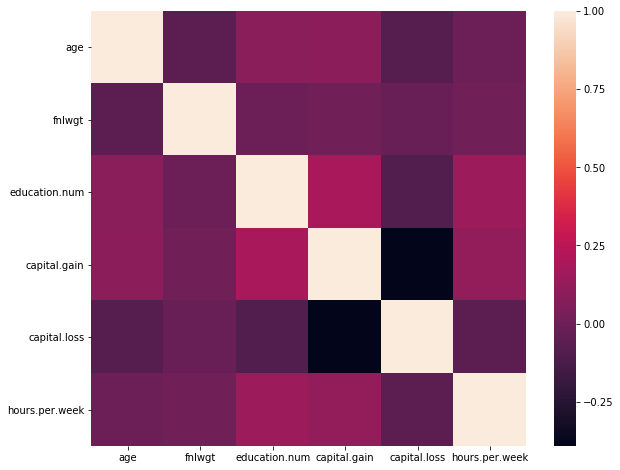

In [149]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),  square=True, ax=ax)

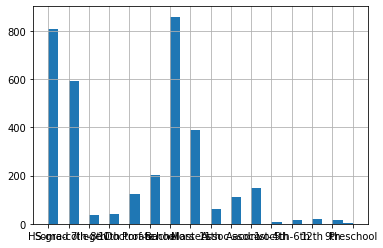

In [150]:
data['education'].hist(bins=30)

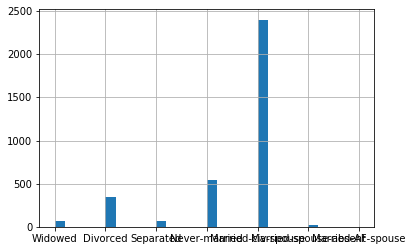

In [151]:
data['marital.status'].hist(bins=30)

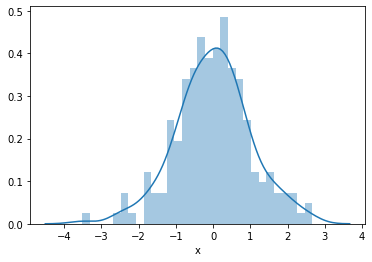

In [152]:
#Variable Distribution
np.random.seed(29) # for reproducibility

n = 200 # in the book, we pass 200 within brackets directly, without defining n
x = np.random.randn(n)

data_norm = pd.DataFrame([x]).T
data_norm.columns = ['x']
sns.distplot(data_norm['x'], bins=30)

In [153]:
# from feature-engine
from feature_engine import missing_data_imputers as mdi
# for one hot encoding with feature-engine
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
# import relevant modules for feature engineering
from sklearn.preprocessing import RobustScaler
from feature_engine import missing_data_imputers as mdi
from feature_engine import discretisers as dsc
from feature_engine import categorical_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
from sklearn.model_selection import GridSearchCV


In [154]:
# separate into training and testing set
from sklearn.model_selection import train_test_split    
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('income', axis=1),  # predictors
    data['income'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((2789, 14), (698, 14))

In [155]:
X_train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1262,20,NaN,369678.0,12th,8,Never-married,NaN,Not-in-family,Other,Male,0,1602,40,United-States
3293,42,Private,255847.0,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,4386,0,48,United-States
1662,37,Self-emp-not-inc,353298.0,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,99999,0,50,United-States
1626,43,Private,58447.0,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,55,United-States
3107,44,Self-emp-inc,103643.0,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,5013,0,60,Greece


In [156]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2789 entries, 1262 to 2732
Data columns (total 14 columns):
age               2789 non-null int64
workclass         2693 non-null object
fnlwgt            2788 non-null float64
education         2744 non-null object
education.num     2789 non-null int64
marital.status    2762 non-null object
occupation        2676 non-null object
relationship      2774 non-null object
race              2783 non-null object
sex               2773 non-null object
capital.gain      2789 non-null int64
capital.loss      2789 non-null int64
hours.per.week    2789 non-null int64
native.country    2715 non-null object
dtypes: float64(1), int64(5), object(8)
memory usage: 326.8+ KB


In [157]:
#handling outliers
from feature_engine.outlier_removers import Winsorizer
winsorizer = Winsorizer(distribution='skewed', # choose skewed for IQR rule boundaries or gaussian for mean and std
                          tail='both', # cap left, right or both tails 
                          fold=1.5,
                          variables=discrete)

winsorizer.fit(X_train)

Winsorizer(distribution='skewed', fold=1.5, tail='both',
           variables=['age', 'fnlwgt', 'education.num', 'capital.gain',
                      'capital.loss', 'hours.per.week'])

In [158]:
X_train = winsorizer.transform(X_train)
X_test = winsorizer.transform(X_test)

In [159]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')



In [160]:
from sklearn.preprocessing import StandardScaler
income_pipe = Pipeline([

    # missing data imputation 
    ('imputer_num_mean',
     mdi.MeanMedianImputer(imputation_method='mean',variables=['fnlwgt'])),

    # categorical encoding 
    ('encoder_rare_label',
     RareLabelCategoricalEncoder(tol=0.01,
                                    n_categories=10,
                                    variables=to_cat)),
    ('categorical_encoder',
     OneHotCategoricalEncoder( top_categories=None,
                               variables=to_cat, # we can select which variables to encode
                               drop_last=True)),
     ('scale',StandardScaler())
    
])

In [161]:
income_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer_num_mean',
                 MeanMedianImputer(imputation_method='mean',
                                   variables=['fnlwgt'])),
                ('encoder_rare_label',
                 RareLabelCategoricalEncoder(n_categories=10, tol=0.01,
                                             variables=['sex', 'native.country',
                                                        'marital.status',
                                                        'occupation', 'race',
                                                        'workclass',
                                                        'education',
                                                        'relationship'])),
                ('categorical_encoder',
                 OneHotCategoricalEncoder(drop_last=True, top_categories=None,
                                          variables=['sex', 'native.country',
                                                     'marital.statu

In [162]:
# Apply Transformations
X_train=income_pipe.transform(X_train)
X_test=income_pipe.transform(X_test)

### Basic Algorithm

In [163]:
# Naive Algorithm 
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

In [164]:
model_dummy = DummyClassifier(strategy='stratified',random_state=123)
model_dummy.fit(X_train,y_train)
cv_scores = cross_val_score(model_dummy, X_train, y_train,scoring='roc_auc')

# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Check test data set performance
print("Naive Algorithm Test Performance: ", model_dummy.score(X_test,y_test))

Mean Cross-validation scores: 0.49429082219831627

Naive Algorithm Test Performance:  0.5830945558739254


In [165]:
#logistic regression
# Train a logistic regression model, report the coefficients and model performance 

# YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

clf = LogisticRegression().fit(X_train, y_train)

cv_scores = cross_val_score(clf, X_train, y_train)
train_preds=clf.predict(X_train)
test_preds= clf.predict(X_test)
# Mean Cross validation Score
print("Mean Cross-validation scores: {}".format(cv_scores.mean()))
print()

# Print Co-efficients
print("Logistic.coef_:", clf.coef_)
print("Logistic.intercept_:", clf.intercept_)

# Check test data set performance
print("Logistic Performance: ", clf.score(X_test,y_test))



Mean Cross-validation scores: 0.8486966146084697

Logistic.coef_: [[ 1.70601828e-01  5.89717216e-02  6.64363727e-01  4.25275750e+00
   1.70579209e+00  3.74776720e-01 -2.63157002e-01 -4.98193225e-01
   5.31348814e-02 -5.83752098e-01  3.33860770e-01 -4.33340195e-01
   0.00000000e+00 -2.00646956e-01 -1.46935147e-01 -1.14752241e-01
   1.29760954e-02  9.23844484e-02  2.49766285e-01  3.64968583e-01
   4.97209023e-01 -8.60839412e-02  1.02144753e-01  1.90281068e-01
   2.49105225e-01  1.02905394e-01  1.50185637e-01  2.80457166e-02
  -5.71375400e-02 -2.65456904e-01 -1.41911531e-01 -1.28096380e-01
  -7.81424959e-02  0.00000000e+00  4.59053449e-02  4.29817150e-03
   1.48929303e-01 -5.86619467e-04 -4.13987190e-02 -1.13966443e-02
  -5.88226021e-02 -1.94554478e-01  4.31540491e-03 -1.48683245e-01
  -1.19399919e-01 -5.27844222e-02 -5.84853392e-02 -1.70089887e-01
   9.42305363e-03 -7.48561015e-02 -6.30140025e-03  1.96289057e-01
   1.72473338e-01  3.21974344e-02  3.05339787e-01  2.09206725e-01
  -1.78933

In [46]:
# Train a KNN model, report the coefficients, the best parameters, and model performance 
# hint: find the optimal k

# YOUR CODE HERE

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()


# define a list of parameters

param_knn = {'n_neighbors': range(5,25)}

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_knn.best_score_))
print()

#find best parameters
print('KNN parameters: ', grid_knn.best_params_)

# Check test data set performance
print("KNN Test Performance: ", grid_knn.score(X_test,y_test))

Best Mean Cross-validation score: 0.78

KNN parameters:  {'n_neighbors': 24}
KNN Test Performance:  0.7822349570200573


In [41]:
# Train a Decision Tree model, report the coefficients, the best parameters, and model performance (10 points)
# hint: find the optimal max_depth

# YOUR CODE HERE
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0)

#define a list of parameters
param_dtree = {'max_depth': range(1,20)}

#apply grid search
grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

#find best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# Check test data set performance
print("Decision Tree Performance: ", grid_dtree.score(X_test,y_test))

Best Mean Cross-validation score: 0.95

Decision Tree parameters:  {'max_depth': 13}
Decision Tree Performance:  0.9527220630372493


In [54]:
#SVM Model
from sklearn import svm

supvm = svm.SVC(random_state=0)

C = [0.1, 1, 10]

param_svm = [{'kernel': ['rbf'],
               'C': C,
               'gamma': [0.01, 0.1, 1]},
              {'kernel': ['linear'],
               'C': C}]

grid_svm = GridSearchCV(supvm, param_svm, cv=5,
                          return_train_score=True,scoring = 'roc_auc')
grid_svm.fit(X_train, y_train)
print('train score: ', grid_svm.score(X_train, y_train))
print('test score: ', grid_svm.score(X_train, y_train))
print("Best parameters: {}".format(grid_svm.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svm.best_score_))

train score:  0.9297578146407268
test score:  0.9297578146407268
Best parameters: {'C': 10, 'kernel': 'linear'}
Best cross-validation score: 0.92


In [62]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc =RandomForestClassifier(random_state=42)
rfc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

grid_rf = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, scoring = 'roc_auc')
grid_rf.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {grid_rf.best_score_}')
print(f'Best Mean Cross Validation Score is {grid_rf.best_params_}')
print(f'Train score is {grid_rf.score(X_train,y_train)}')
print(f'Test score is {grid_rf.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.9630388508707783
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.9869445673990075
Test score is 0.9671213811117149


In [56]:
#Gradient Boost Model
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, )
gbc_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.9659401684652164
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 4, 'n_estimators': 150}
Train score is 1.0
Test score is 0.9613180515759312


In [57]:
# Extra Tress Classifier
from  sklearn.ensemble import ExtraTreesClassifier
etc= ExtraTreesClassifier(random_state=42)
etc_param = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, )
etc_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')


Best Mean Cross Validation Score is 0.8153491245342753
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Train score is 0.8408031552527788
Test score is 0.839541547277937


In [58]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [170]:
#XG boost Model
from xgboost import XGBClassifier
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4],
              'n_estimators' : [50,100],
              'learning_rate' : [0.1,0.5],
               'min_child_weight' : [1,3],
                'subsample':[0.6,0.7]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, )
xgbc_grid.fit(X_train,y_train)
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.9630682805351247
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 0.8}
Train score is 1.0
Test score is 0.9598853868194842


In [72]:

estimators_ = [('dtree',grid_dtree.best_estimator_),
            ('rfc',grid_rf.best_estimator_),('gbc',gbc_grid.best_estimator_),
            ('etc',etc_grid.best_estimator_),('xgbc',xgbc_grid.best_estimator_)]

In [284]:
classifiers.keys()

dict_keys(['dtree', 'rfc', 'etc', 'gbc', 'xgbc'])

In [285]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\katar\anaconda3\envs\buan6341_2020\lib\site-packages (0.22.2.post1)
Note: you may need to restart the kernel to use updated packages.


In [287]:

results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]
     
    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [298]:
#Stacking Classifier
from sklearn.ensemble import StackingClassifier
sclf1 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf1_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.9907651564881614
Best Mean Cross Validation params is {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score is 1.0
Test score is 0.9911154326460186


### CostSensitive Algorithms

In [367]:
#cost sensitive logistic regession
param_grid = {   
    'class_weight': ['balanced'],
}
#apply grid search
costgrid_logreg= GridSearchCV(LogisticRegression(solver='lbfgs'), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
costgrid_logreg.fit(X_train, y_train)

print("Best parameters: {}".format(costgrid_logreg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(costgrid_logreg.best_score_))

Best parameters: {'class_weight': 'balanced'}
Best Mean cross-validation score: 0.92


In [368]:
#svc
param_grid = {
    'class_weight': ['balanced'],
}
#apply grid search
costgrid_svc= GridSearchCV(svm.SVC(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
costgrid_svc.fit(X_train, y_train)

print("Best parameters: {}".format(costgrid_svc.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(costgrid_svc.best_score_))

Best parameters: {'class_weight': 'balanced'}
Best Mean cross-validation score: 0.89


In [369]:
#decison tree
param_grid = { 
    'class_weight': ['balanced'],
}
#apply grid search
costgrid_dtree= GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
costgrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(costgrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(costgrid_dtree.best_score_))

Best parameters: {'max_depth': 7}
Best Mean cross-validation score: 0.95


In [167]:
#xgb
param_grid = { 
     'max_depth' : [2,4],
              'n_estimators' : [50,100],
              'learning_rate' : [0.1,0.5],
               'min_child_weight' : [1,3],
                'subsample':[0.6,0.7,0.8,0.9]
}
#apply grid search
costgrid_xgboost= GridSearchCV(XGBClassifier(), param_grid, cv=5, n_jobs=2, scoring='roc_auc')
costgrid_xgboost.fit(X_train, y_train)

print("Best parameters: {}".format(costgrid_xgboost.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(costgrid_xgboost.best_score_))

Best parameters: {'learning_rate': 0.5, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.9}
Best Mean cross-validation score: 0.99


In [373]:
#random forest
from sklearn.model_selection import RepeatedStratifiedKFold
rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(rfc, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.972


In [374]:
#extratrees
etc = ExtraTreesClassifier(n_estimators=50, class_weight='balanced')

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(etc, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.925


In [356]:
pip install -U imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/c8/73/36a13185c2acff44d601dc6107b5347e075561a49e15ddd4e69988414c3e/imbalanced_learn-0.6.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [361]:
#Bagging decision tree with under sampling
from imblearn.ensemble import BalancedBaggingClassifier

b_dtree = BalancedBaggingClassifier()

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(b_dtree, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

print('Mean ROC AUC: %.3f' % scores.mean())

Mean ROC AUC: 0.982


### Data Sampling Algorithms

In [47]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

In [48]:
#decisiontreee
pipe_roc_dtree = Pipeline([('smote',SMOTE()),('dtree',DecisionTreeClassifier(max_depth=5))])
param_roc_dtree = {'smote__k_neighbors': [1,2,3]}

datagrid_dtree= GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True, scoring='roc_auc')
datagrid_dtree.fit(X_train, y_train)

print("Best parameters: {}".format(datagrid_dtree.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(datagrid_dtree.best_score_))

Best parameters: {'max_depth': 6}
Best Mean cross-validation score: 0.97


In [49]:
#logistic regression
pipe_roc_lg = Pipeline([('smote',SMOTE()),('lg',LogisticRegression())])
param_roc_lg = {'smote__k_neighbors': [1,2,3]}

datagrid_lg= GridSearchCV(pipe_roc_lg,param_roc_lg, cv=5, scoring='accuracy')
datagrid_lg.fit(X_train, y_train)

print("Best parameters: {}".format(datagrid_lg.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(datagrid_lg.best_score_))

Best parameters: {'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.84


In [50]:
#knn
pipe_roc_knn = Pipeline([('smote',SMOTE()),('knn',KNeighborsClassifier(n_neighbors=6))])
param_roc_knn = {'smote__k_neighbors': [1,2,3,4,5]}

datagrid_knn= GridSearchCV(knn, param_knn, cv=5, return_train_score=True)
datagrid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(datagrid_knn.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(datagrid_knn.best_score_))

Best parameters: {'n_neighbors': 24}
Best Mean cross-validation score: 0.78


In [51]:
#svm
pipe_roc_svm = Pipeline([('smote',SMOTE()),('svm',svm.SVC(C=10,gamma=0.1,kernel='rbf'))])
param_roc_svm = {'smote__k_neighbors': [1,2,3,4,5]}

datagrid_svm= GridSearchCV(pipe_roc_svm,param_roc_svm, cv=5, n_jobs=2, scoring='roc_auc')
datagrid_svm.fit(X_train, y_train)

print("Best parameters: {}".format(datagrid_svm.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(datagrid_svm.best_score_))

Best parameters: {'smote__k_neighbors': 4}
Best Mean cross-validation score: 0.80


In [52]:
#randomforest
pipe_roc_rf = Pipeline([('smote',SMOTE()),('rf',RandomForestClassifier(n_estimators=50,criterion='gini',
                                                                       max_features='auto'))])
param_roc_rf = {'smote__k_neighbors': [1,2,3,4,5],
                'rf__max_depth' : [4,5]}

datagrid_rf= GridSearchCV(pipe_roc_rf,param_roc_rf, cv=5, n_jobs=2, scoring='roc_auc')
datagrid_rf.fit(X_train, y_train)

print("Best parameters: {}".format(datagrid_rf.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(datagrid_rf.best_score_))

Best parameters: {'rf__max_depth': 5, 'smote__k_neighbors': 1}
Best Mean cross-validation score: 0.94


In [63]:
#xgb
pipe_roc_xgb = Pipeline([('smote',SMOTE()),('xgb',XGBClassifier(random_state=42,
                                                                            early_stopping_rounds=2,
                                                                            n_estimators=100,
                                                                            objective ='binary:logistic',
                                                                            max_depth = 4,
                                                                             ))])
param_roc_xgb = {'smote__k_neighbors': [1,2,3,4,5],
                 'xgb__learning_rate' : [0.1,0.5]}

datagrid_xgb= GridSearchCV(pipe_roc_xgb,param_roc_xgb, cv=5, n_jobs=2, scoring='roc_auc')
datagrid_xgb.fit(X_train, y_train)

print("Best parameters: {}".format(datagrid_xgb.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(datagrid_xgb.best_score_))

Best parameters: {'smote__k_neighbors': 2, 'xgb__learning_rate': 0.5}
Best Mean cross-validation score: 0.99


In [64]:
#easy ensemble classifier
from imblearn.ensemble import EasyEnsembleClassifier
pipe_roc_ee = Pipeline([('smote',SMOTE()),('ee',EasyEnsembleClassifier())])
param_roc_ee = {'smote__k_neighbors': [1,2,3,4,5]}

datagrid_ee= GridSearchCV(pipe_roc_ee,param_roc_ee, cv=5, n_jobs=2, scoring='roc_auc')
datagrid_ee.fit(X_train, y_train)

print("Best parameters: {}".format(datagrid_ee.best_params_))
print("Best Mean cross-validation score: {:.2f}".format(datagrid_ee.best_score_))

Best parameters: {'smote__k_neighbors': 2}
Best Mean cross-validation score: 0.97


In [68]:
estimators_ = [('dtree',grid_dtree.best_estimator_),
            ('rf',datagrid_rf.best_estimator_),('gbc',gbc_grid.best_estimator_),
            ('etc',etc_grid.best_estimator_),('xgbc',xgbc_grid.best_estimator_)]

In [70]:
from sklearn.ensemble import StackingClassifier
sclf2 = StackingClassifier(estimators= estimators_
                            , final_estimator=LogisticRegression())
sclf2_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True,scoring='roc_auc' )
sclf2_grid.fit(X_train,y_train)

print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation params is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')

Best Mean Cross Validation Score is 0.9655798150614853
Best Mean Cross Validation params is {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score is 1.0
Test score is 0.9670487106017192
